In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import os
# os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle_data"

In [ ]:
# !kaggle datasets download -d mersico/dangerous-heartbeat-dataset-dhd

 79% 87.0M/110M [00:00<00:00, 92.9MB/s]
100% 110M/110M [00:01<00:00, 113MB/s]  


In [ ]:
# %%capture --no-display

# ! unzip /content/dangerous-heartbeat-dataset-dhd.zip

In [ ]:
# import os

# # Specify the folder path
# folder_path = "/content/drive/MyDrive/dataset/audio/"

# # Initialize counters for files and directories
# file_count = 0
# directory_count = 0

# # Iterate through the items in the folder
# for item in os.listdir(folder_path):
#     item_path = os.path.join(folder_path, item)
#     if os.path.isfile(item_path):
#         file_count += 1
#     elif os.path.isdir(item_path):
#         directory_count += 1

# # Print the counts
# print(f"Number of files in '{folder_path}': {file_count}")
# print(f"Number of directories in '{folder_path}': {directory_count}")
# print(f"Total items in '{folder_path}': {file_count + directory_count}")

Number of files in '/content/drive/MyDrive/dataset/audio/': 1795
Number of directories in '/content/drive/MyDrive/dataset/audio/': 0
Total items in '/content/drive/MyDrive/dataset/audio/': 1795


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
import IPython.display as ipd

In [ ]:
# Load the labels
labels = pd.read_csv(f'/content/drive/MyDrive/dataset/data.csv')
labels

Unnamed: 0                                         filename     label
0              0            artifact__201012172012 - Copy (2).wav  artifact
1              1            artifact__201012172012 - Copy (3).wav  artifact
2              2            artifact__201012172012 - Copy (4).wav  artifact
3              3     artifact__201012172012 - Copy - Copy (2).wav  artifact
4              4  artifact__201012172012 - Copy - Copy - Copy.wav  artifact
...          ...                                              ...       ...
1789        1789                 normal__296_1311682952647_A1.wav    normal
1790        1790                 normal__296_1311682952647_A2.wav    normal
1791        1791                  normal__298_1311685888900_B.wav    normal
1792        1792                  normal__299_1311770522820_C.wav    normal
1793        1793                 normal__300_1311772096120_C1.wav    normal

[1794 rows x 3 columns]

In [ ]:
# Display the first few rows of the labels
print(labels.head())

# Check the distribution of classes
print(labels['label'].value_counts())

   Unnamed: 0                                         filename     label
0           0            artifact__201012172012 - Copy (2).wav  artifact
1           1            artifact__201012172012 - Copy (3).wav  artifact
2           2            artifact__201012172012 - Copy (4).wav  artifact
3           3     artifact__201012172012 - Copy - Copy (2).wav  artifact
4           4  artifact__201012172012 - Copy - Copy - Copy.wav  artifact
extrastole    368
extrahls      364
artifact      359
murmur        352
normal        351
Name: label, dtype: int64


In [ ]:
# Load an audio file
filename = '/content/drive/MyDrive/dataset/audio/' + labels['filename'][0]

audio, sample_rate = librosa.load(filename, sr=None)

# Display the audio
ipd.Audio(audio, rate=sample_rate)

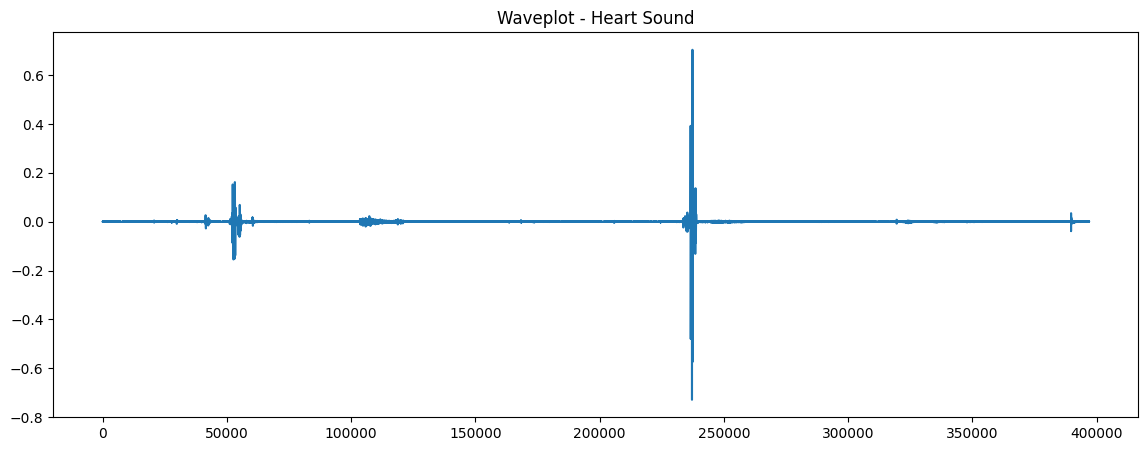

In [ ]:
# Plot the audio file
plt.figure(figsize=(14, 5))
plt.plot(audio)
plt.title('Waveplot - Heart Sound')
plt.show()

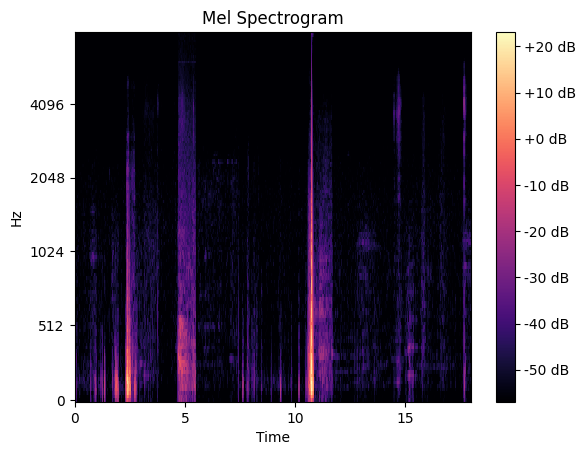

In [ ]:
# Generate and display a spectrogram
spectrogram = librosa.feature.melspectrogram(y=audio, sr=sample_rate)
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time')
plt.title('Mel Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.show()

In [ ]:
# Initialize lists to hold spectrograms and labels
spectrograms = []
label_list = []

In [ ]:
# Define a fixed length for the spectrograms
fixed_length = 1000  # You may need to adjust this value

# Iterate over each audio file
for index, row in labels.iterrows():
    # Load the audio file
    try:
      filename = '/content/drive/MyDrive/dataset/audio/' + row['filename']
      audio, sample_rate = librosa.load(filename, sr=None)
    except:
      pass
    # Generate the spectrogram
    spectrogram = librosa.feature.mfcc(y=audio, sr=sample_rate)
    spectrogram = librosa.power_to_db(spectrogram)

    # Pad or truncate the spectrogram to the fixed length
    if spectrogram.shape[1] > fixed_length:
        spectrogram = spectrogram[:, :fixed_length]
    else:
        padding = fixed_length - spectrogram.shape[1]
        spectrogram = np.pad(spectrogram, ((0, 0), (0, padding)), 'constant')

    # Append the spectrogram and label to the respective lists
    spectrograms.append(spectrogram)
    label_list.append(row['label'])

<ipython-input-10-02f1a5db9111>:9: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sample_rate = librosa.load(filename, sr=None)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [ ]:
# Convert the lists to numpy arrays
spectrograms = np.array(spectrograms)
label_list = np.array(label_list)

# Print the shapes of the arrays to check
print(spectrograms.shape)
print(label_list.shape)

(1794, 20, 1000)
(1794,)


extrastole    368
extrahls      364
artifact      359
murmur        352
normal        351
Name: label, dtype: int64


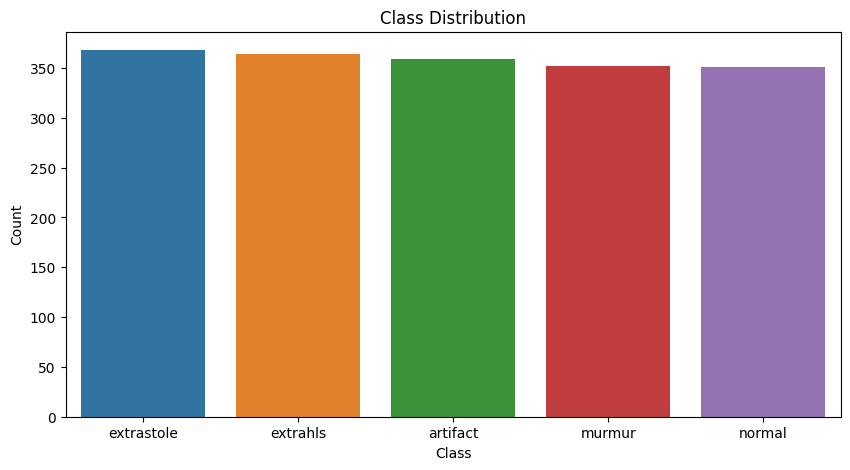

In [ ]:
# Analyze the distribution of different classes
class_distribution = labels['label'].value_counts()
print(class_distribution)

# Plot the class distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [ ]:
# Listen to samples from each class
for label in class_distribution.index:
    sample_file = labels[labels['label'] == label]['filename'].values[0]
    print(f'Class: {label}')
    filename = '/content/drive/MyDrive/dataset/audio/' + sample_file
    audio, sample_rate = librosa.load(filename, sr=None)
    ipd.display(ipd.Audio(audio, rate=sample_rate))

Class: extrastole


Class: extrahls


Class: artifact


Class: murmur


Class: normal


Class: extrastole


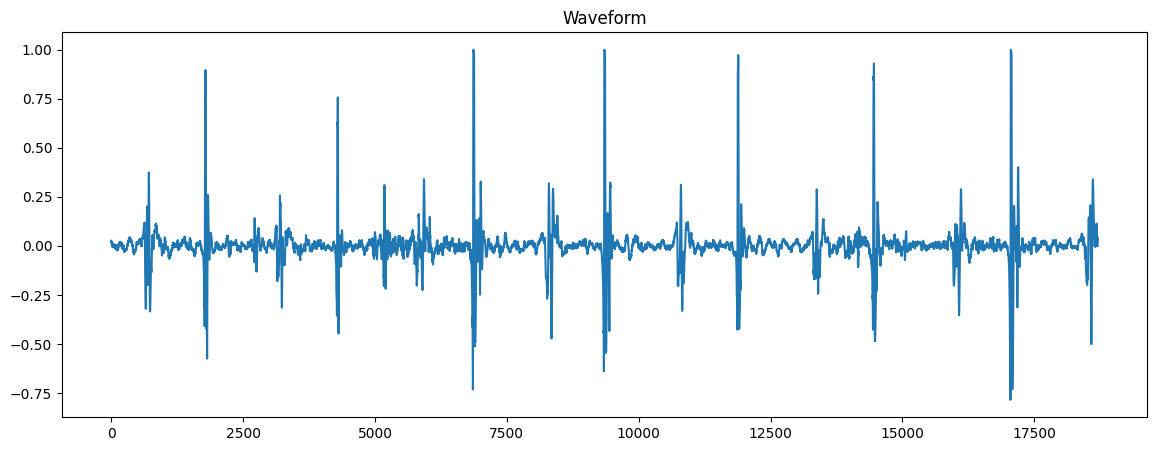

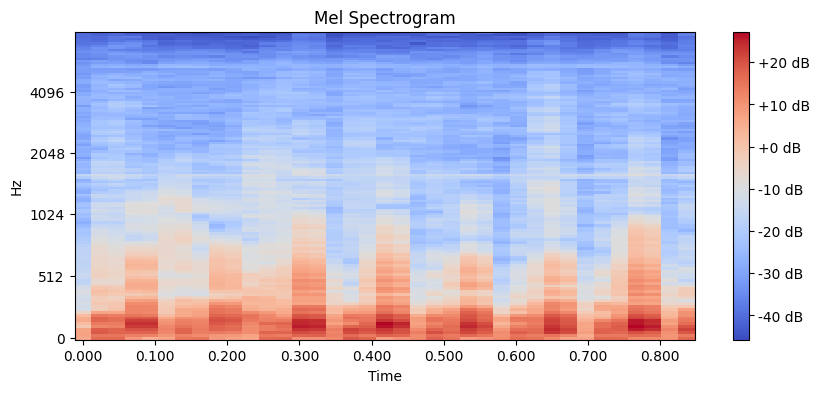

Class: extrahls


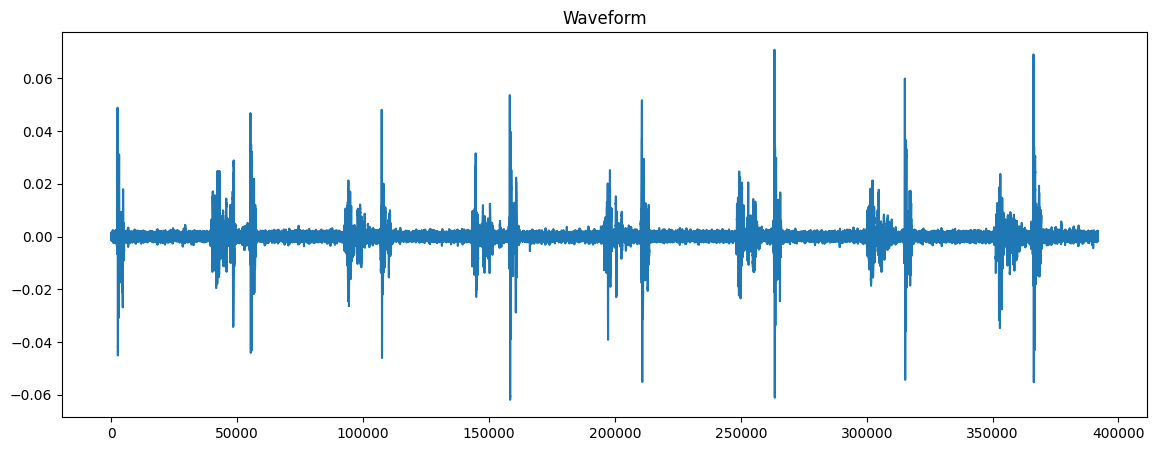

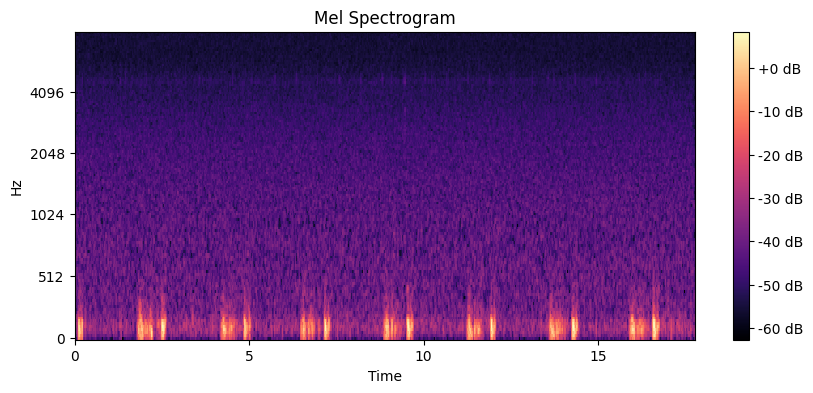

Class: artifact


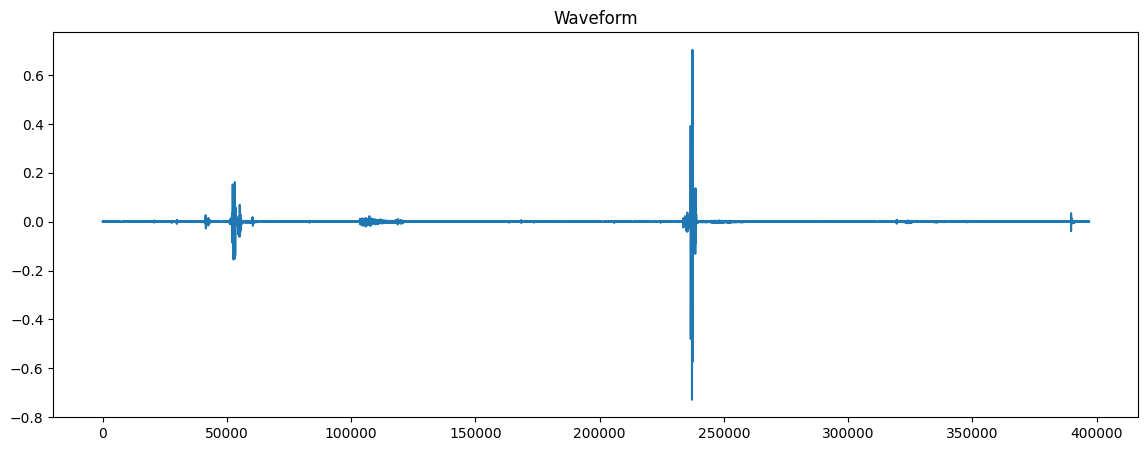

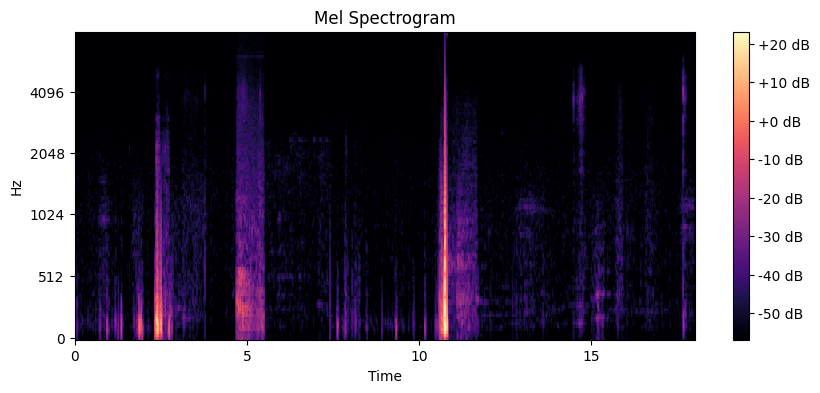

Class: murmur


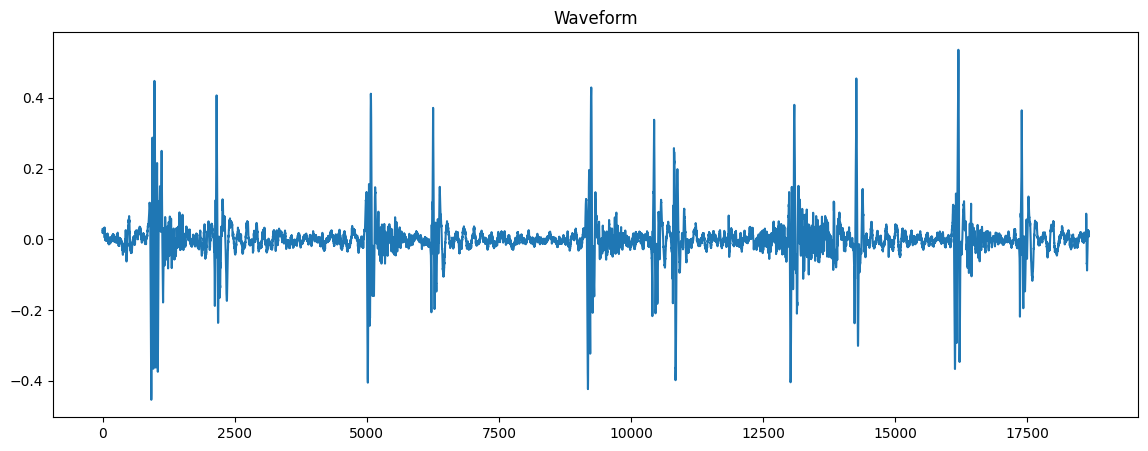

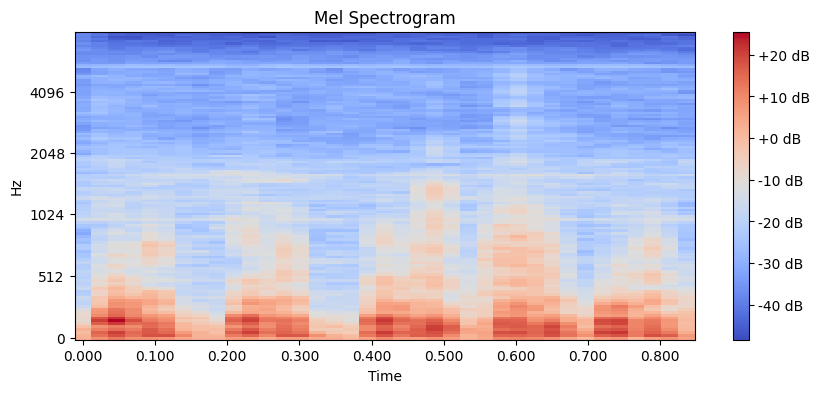

Class: normal


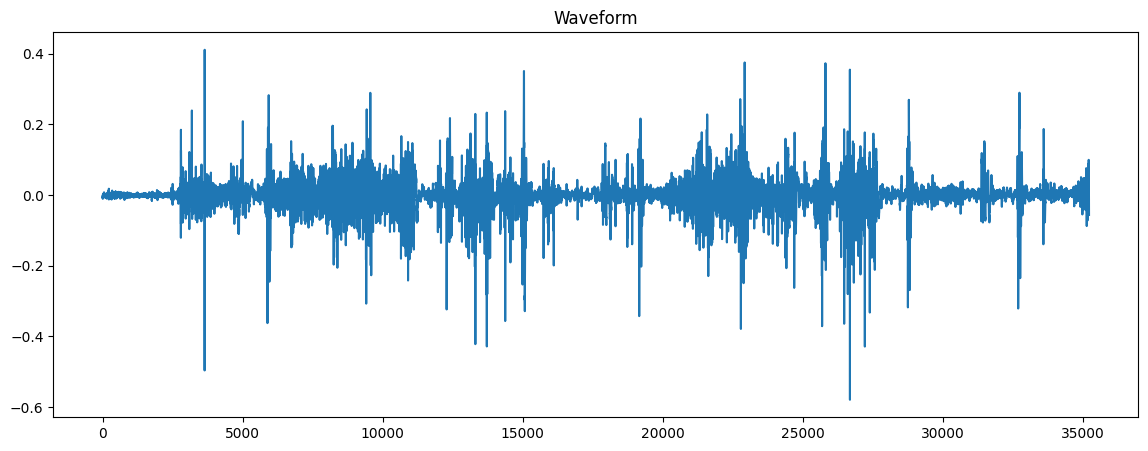

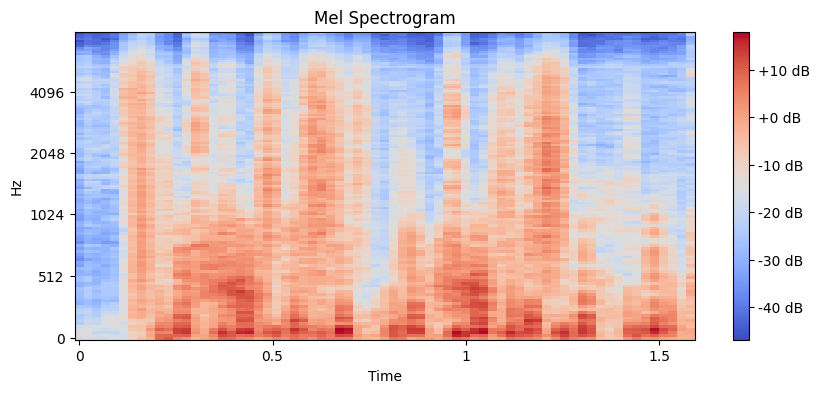

In [ ]:
# Visualize the audio files
for label in class_distribution.index:
    sample_file = labels[labels['label'] == label]['filename'].values[0]
    print(f'Class: {label}')
    filename = '/content/drive/MyDrive/dataset/audio/' + sample_file
    audio, sample_rate = librosa.load(filename, sr=None)

    # Plot the waveform
    plt.figure(figsize=(14, 5))
    plt.plot(audio)
    plt.title('Waveform')
    plt.show()

    # Generate and display a spectrogram
    spectrogram = librosa.feature.melspectrogram(y=audio, sr=sample_rate)
    spectrogram = librosa.power_to_db(spectrogram)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time')
    plt.title('Mel Spectrogram')
    plt.colorbar(format='%+2.0f dB')
    plt.show()

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(spectrograms, label_list, test_size=0.1,shuffle=True, stratify=label_list, random_state=42)

# Further split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1,shuffle=True, stratify=y_train, random_state=42)

# Print the shapes of the datasets to check
print(f'Training set: {X_train.shape}, {y_train.shape}')
print(f'Validation set: {X_val.shape}, {y_val.shape}')
print(f'Test set: {X_test.shape}, {y_test.shape}')

Training set: (1452, 20, 1000), (1452,)
Validation set: (162, 20, 1000), (162,)
Test set: (180, 20, 1000), (180,)


In [ ]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

In [ ]:
from imblearn.over_sampling import SMOTE

X_train_flat = X_train.reshape(X_train.shape[0], -1)

sm = SMOTE(random_state=27, sampling_strategy='auto')
X_train, y_train = sm.fit_resample(X_train_flat, y_train)
y_train

array(['extrahls', 'artifact', 'extrastole', ..., 'normal', 'normal',
       'normal'], dtype='<U10')

In [ ]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,Activation
from keras.optimizers import Adam ,SGD , RMSprop , Adamax ,Nadam
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping , ReduceLROnPlateau , ModelCheckpoint
import datetime

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',
                         patience = 7,
                         verbose = 1,
                         factor = 0.01,
                         min_lr = 1e-10)

mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=30)

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

calback = [lrd , mcp , es , tensorboard_callback]

In [ ]:
# Reshape the data to fit the model
X_train = X_train.reshape(X_train.shape[0], 20, 1000, 1)
X_val = X_val.reshape(X_val.shape[0], 20, 1000, 1)
X_test = X_test.reshape(X_test.shape[0], 20, 1000, 1)

# Initialize the encoder
encoder = LabelEncoder()

# Fit the encoder and transform the labels
y_train = encoder.fit_transform(y_train)
y_val = encoder.transform(y_val)

In [ ]:
# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(20, 1000, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))  # Replace 5 with the number of classes in your dataset

# Compile the model
model.compile(optimizer=Adamax(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 18, 998, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 9, 499, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 497, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 3, 248, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 246, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 15744)             0

In [ ]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=16,callbacks=calback)

Epoch 1/100
94/94 [==============================] - ETA: 0s - loss: 1.0428 - accuracy: 0.5342

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


94/94 [==============================] - 14s 19ms/step - loss: 1.0428 - accuracy: 0.5342 - val_loss: 0.7410 - val_accuracy: 0.6235 - lr: 0.0010
Epoch 2/100
94/94 [==============================] - 1s 12ms/step - loss: 0.8446 - accuracy: 0.6161 - val_loss: 0.6781 - val_accuracy: 0.6728 - lr: 0.0010
Epoch 3/100
94/94 [==============================] - 1s 12ms/step - loss: 0.7358 - accuracy: 0.6678 - val_loss: 0.5975 - val_accuracy: 0.7284 - lr: 0.0010
Epoch 4/100
94/94 [==============================] - 1s 12ms/step - loss: 0.6801 - accuracy: 0.6926 - val_loss: 0.5554 - val_accuracy: 0.7346 - lr: 0.0010
Epoch 5/100
94/94 [==============================] - 1s 15ms/step - loss: 0.6273 - accuracy: 0.7060 - val_loss: 0.5045 - val_accuracy: 0.8025 - lr: 0.0010
Epoch 6/100
94/94 [==============================] - 1s 14ms/step - loss: 0.6018 - accuracy: 0.7302 - val_loss: 0.4816 - val_accuracy: 0.8148 - lr: 0.0010
Epoch 7/100
94/94 [==============================] - 1s 14ms/step - loss: 0.5561 

In [ ]:
# %tensorboard --logdir logs/fit

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import classification_report, confusion_matrix

# # Initialize the label encoder
# label_encoder = LabelEncoder()

# # Fit and transform the training labels
# y_train_encoded = label_encoder.fit_transform(y_train)

# # Transform the test labels
# y_test_encoded = label_encoder.transform(y_test)

# # Now, y_train_encoded and y_test_encoded contain integer labels

# # Predict the classes on the test set
# y_pred = model.predict(X_test)
# y_pred_classes = np.argmax(y_pred, axis=1)

# # Use y_test_encoded for the classification report and confusion matrix
# print(classification_report(y_test_encoded, y_pred_classes))
# print(confusion_matrix(y_test_encoded, y_pred_classes))

ValueError: ignored

In [ ]:
y_test_encoded = encoder.transform(y_test)

# Predict the classes on test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Now use y_test_encoded for the classification report and confusion matrix
print(classification_report(y_test_encoded, y_pred_classes))
print(confusion_matrix(y_test_encoded, y_pred_classes))

6/6 [==============================] - 1s 37ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      1.00      0.97        37
           2       0.84      1.00      0.91        37
           3       0.87      0.97      0.92        35
           4       0.95      0.60      0.74        35

    accuracy                           0.92       180
   macro avg       0.92      0.91      0.91       180
weighted avg       0.92      0.92      0.91       180

[[36  0  0  0  0]
 [ 0 37  0  0  0]
 [ 0  0 37  0  0]
 [ 0  0  0 34  1]
 [ 0  2  7  5 21]]


In [ ]:
def predict(filename):

    audio, sample_rate = librosa.load(filename, sr=None)
    # Preprocess the audio the same way you did for training
    spectrogram = librosa.feature.mfcc(y=audio, sr=sample_rate)
    spectrogram = librosa.power_to_db(spectrogram)

    # Pad or truncate the spectrogram to the fixed length
    if spectrogram.shape[1] > fixed_length:
        spectrogram = spectrogram[:, :fixed_length]
    else:
        padding = fixed_length - spectrogram.shape[1]
        spectrogram = np.pad(spectrogram, ((0, 0), (0, padding)), 'constant')

    # Reshape the spectrogram before scaling
    # spectrogram = spectrogram.reshape(-1, 1000)  # Assuming 1000 features
    spectrogram = np.array(spectrogram)

    # Reshape the spectrogram back to its original shape
    spectrogram = spectrogram.reshape(1, 20, 1000, 1)

    # Use the model to make a prediction
    prediction = model.predict(spectrogram)

    # Decode the prediction
    predicted_class = encoder.inverse_transform([np.argmax(prediction)])

    return predicted_class[0]

filename = "/content/drive/MyDrive/dataset/audio/extrastole__134_1306428161797_C1 - Copy (2) - Copy.wav"
# Test the function
print(predict(filename))

1/1 [==============================] - 0s 30ms/step
extrastole


In [ ]:
# Save the model
model.save('model1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Define the model architecture
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_uniform',input_shape=(20, 1000, 1)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_uniform'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_uniform'))
model2.add(Flatten())
model2.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model2.add(Dropout(0.5))
model2.add(Dense(5, activation='softmax'))  # Replace 5 with the number of classes in your dataset

# Compile the model
model2.compile(optimizer=Adamax(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 18, 998, 32)       320       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 9, 499, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 7, 497, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 3, 248, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 1, 246, 64)        36928     
                                                                 
 flatten_7 (Flatten)         (None, 15744)            

In [ ]:
history = model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=16,callbacks=calback)

Epoch 1/100
96/96 [==============================] - ETA: 0s - loss: 1.4343 - accuracy: 0.5497

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


96/96 [==============================] - 4s 21ms/step - loss: 1.4343 - accuracy: 0.5497 - val_loss: 0.8371 - val_accuracy: 0.6220 - lr: 0.0010
Epoch 2/100
96/96 [==============================] - 1s 13ms/step - loss: 0.8112 - accuracy: 0.6275 - val_loss: 0.7938 - val_accuracy: 0.7134 - lr: 0.0010
Epoch 3/100
96/96 [==============================] - 1s 12ms/step - loss: 0.7236 - accuracy: 0.6562 - val_loss: 0.7654 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 4/100
96/96 [==============================] - 1s 12ms/step - loss: 0.6624 - accuracy: 0.6993 - val_loss: 0.7208 - val_accuracy: 0.7256 - lr: 0.0010
Epoch 5/100
96/96 [==============================] - 1s 12ms/step - loss: 0.6008 - accuracy: 0.7268 - val_loss: 0.7575 - val_accuracy: 0.7805 - lr: 0.0010
Epoch 6/100
96/96 [==============================] - 1s 13ms/step - loss: 0.5614 - accuracy: 0.7529 - val_loss: 0.7194 - val_accuracy: 0.7805 - lr: 0.0010
Epoch 7/100
96/96 [==============================] - 1s 12ms/step - loss: 0.5263 -

In [ ]:
# y_test_encoded = encoder.transform(y_test)

# Predict the classes on test set
y_pred = model2.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Now use y_test_encoded for the classification report and confusion matrix
print(classification_report(y_test_encoded, y_pred_classes))
print(confusion_matrix(y_test_encoded, y_pred_classes))

6/6 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.95      1.00      0.97        37
           2       0.82      1.00      0.90        37
           3       0.89      0.97      0.93        35
           4       0.95      0.60      0.74        35

    accuracy                           0.92       182
   macro avg       0.92      0.91      0.91       182
weighted avg       0.92      0.92      0.91       182

[[38  0  0  0  0]
 [ 0 37  0  0  0]
 [ 0  0 37  0  0]
 [ 0  0  0 34  1]
 [ 0  2  8  4 21]]


In [ ]:

model2 = Sequential()
model2.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='random_normal', input_shape=(20, 1000, 1)))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(32, (3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
# model2.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='random_normal'))
# model2.add(MaxPooling2D(pool_size=(2, 2)))
# model2.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='random_normal'))
# model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(512, activation='relu',kernel_initializer='random_normal'))
# model2.add(Dropout(0.45))
model2.add(Dense(64, activation='relu',kernel_initializer='random_normal'))
# model2.add(Dropout(0.25))
model2.add(Dense(32, activation='relu',kernel_initializer='random_normal'))
model2.add(Dense(5, activation='softmax',))

# optemizer

# SGD = SGD(learning_rate=0.1, momentum=0.9)

# Compile the model
model2.compile(optimizer=Adamax(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 18, 998, 32)       320       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 9, 499, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 7, 497, 32)        9248      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 3, 248, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_8 (Flatten)         (None, 23808)             0         
                                                                 
 dense_16 (Dense)            (None, 512)              

In [ ]:
# Train the model
history = model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=16,callbacks=calback)

Epoch 1/100
96/96 [==============================] - ETA: 0s - loss: 0.8694 - accuracy: 0.5804

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


96/96 [==============================] - 8s 49ms/step - loss: 0.8694 - accuracy: 0.5804 - val_loss: 0.7425 - val_accuracy: 0.6341 - lr: 0.0010
Epoch 2/100
96/96 [==============================] - 4s 42ms/step - loss: 0.6322 - accuracy: 0.6967 - val_loss: 0.6580 - val_accuracy: 0.7439 - lr: 0.0010
Epoch 3/100
96/96 [==============================] - 5s 51ms/step - loss: 0.5235 - accuracy: 0.7712 - val_loss: 0.6270 - val_accuracy: 0.7378 - lr: 0.0010
Epoch 4/100
96/96 [==============================] - 4s 45ms/step - loss: 0.4479 - accuracy: 0.8059 - val_loss: 0.5768 - val_accuracy: 0.7744 - lr: 0.0010
Epoch 5/100
96/96 [==============================] - 5s 50ms/step - loss: 0.3772 - accuracy: 0.8503 - val_loss: 0.5148 - val_accuracy: 0.8354 - lr: 0.0010
Epoch 6/100
96/96 [==============================] - 5s 48ms/step - loss: 0.3173 - accuracy: 0.8739 - val_loss: 0.4661 - val_accuracy: 0.8232 - lr: 0.0010
Epoch 7/100
96/96 [==============================] - 4s 45ms/step - loss: 0.2588 -

In [ ]:
# y_test_encoded = encoder.transform(y_test)

# Predict the classes on test set
y_pred = model2.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Now use y_test_encoded for the classification report and confusion matrix
print(classification_report(y_test_encoded, y_pred_classes))
print(confusion_matrix(y_test_encoded, y_pred_classes))

6/6 [==============================] - 0s 19ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.97      1.00      0.99        37
           2       0.56      1.00      0.72        37
           3       0.88      0.60      0.71        35
           4       0.94      0.43      0.59        35

    accuracy                           0.81       182
   macro avg       0.87      0.81      0.80       182
weighted avg       0.87      0.81      0.81       182

[[38  0  0  0  0]
 [ 0 37  0  0  0]
 [ 0  0 37  0  0]
 [ 0  0 13 21  1]
 [ 0  1 16  3 15]]


In [ ]:
model3 =Sequential()

model3.add(Conv2D(32, (3,3), activation='relu', input_shape=(20, 1000, 1),kernel_initializer='random_normal'))
# model3.add(MaxPooling2D(2,2))

model3.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='random_normal'))
# model3.add(MaxPooling2D(2,2))

model3.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='random_normal'))
# model3.add(MaxPooling2D(2,2))

model3.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='random_normal'))
model3.add(MaxPooling2D(2,2))
model3.add(Dropout(0.5))

model3.add(Flatten())
model3.add(Dense(256, activation='relu',kernel_initializer='random_normal'))

model3.add(Dense(5, activation='softmax'))


# Compile the model
model3.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 18, 998, 32)       320       
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 996, 64)       18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 994, 128)      73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 992, 128)      147584    
                                                                 
 max_pooling2d (MaxPooling2  (None, 6, 496, 128)       0         
 D)                                                              
                                                                 
 dropout_9 (Dropout)         (None, 6, 496, 128)       0         
                                                      

In [ ]:
# Train the model
history = model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=16,callbacks=calback)

Epoch 1/50
70/70 [==============================] - ETA: 0s - loss: 1.4619 - accuracy: 0.6339

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# y_test_encoded = encoder.transform(y_test)

# Predict the classes on test set
y_pred = model3.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Now use y_test_encoded for the classification report and confusion matrix
print(classification_report(y_test_encoded, y_pred_classes))
print(confusion_matrix(y_test_encoded, y_pred_classes))

4/4 [==============================] - 3s 338ms/step
              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.33      0.25      0.29         4
           2       0.33      0.11      0.17         9
           3       0.38      0.35      0.36        26
           4       0.67      0.76      0.71        70

    accuracy                           0.61       117
   macro avg       0.52      0.47      0.48       117
weighted avg       0.58      0.61      0.59       117

[[ 7  0  0  1  0]
 [ 1  1  0  0  2]
 [ 0  0  1  0  8]
 [ 0  0  1  9 16]
 [ 0  2  1 14 53]]


In [ ]:
from tensorflow import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, LSTM, Bidirectional
# from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

In [ ]:
# Assuming your input data is X_train with shape (batch_size, 128, 1000, 1)
# You can reshape it like this:
X_train_res = X_train.reshape(X_train.shape[0], 20, 1000)

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dropout, BatchNormalization, Flatten, Dense
# from tensorflow.keras.optimizers import Adam

model4 = Sequential()

model4.add(LSTM(128, input_shape=(20, 1000),kernel_initializer='random_normal', return_sequences=True))
model4.add(LSTM(128, return_sequences=True,kernel_initializer='random_normal'))
model4.add(Dropout(0.25))

model4.add(LSTM(64, return_sequences=True,kernel_initializer='random_normal'))
model4.add(LSTM(32, return_sequences=True,kernel_initializer='random_normal'))
model4.add(LSTM(64, return_sequences=True,kernel_initializer='random_normal'))
model4.add(BatchNormalization())
model4.add(Dropout(0.15))

model4.add(LSTM(128, return_sequences=True,kernel_initializer='random_normal'))
model4.add(LSTM(128))

model4.add(Flatten())
model4.add(Dense(units=32, activation='relu',kernel_initializer='random_normal'))
model4.add(Dropout(0.4))

model4.add(Dense(units=5, activation='softmax',kernel_initializer='random_normal'))

# Compile the model
model4.compile(optimizer=SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model4.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 20, 128)           578048    
                                                                 
 lstm_9 (LSTM)               (None, 20, 128)           131584    
                                                                 
 dropout_3 (Dropout)         (None, 20, 128)           0         
                                                                 
 lstm_10 (LSTM)              (None, 20, 64)            49408     
                                                                 
 lstm_11 (LSTM)              (None, 20, 32)            12416     
                                                                 
 lstm_12 (LSTM)              (None, 20, 64)            24832     
                                                                 
 batch_normalization_1 (Bat  (None, 20, 64)           

In [ ]:
# Train the model
history = model4.fit(X_train_res, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=16,callbacks=calback)

Epoch 1/50
67/70 [===========================>..] - ETA: 0s - loss: 1.2784 - accuracy: 0.4095

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


70/70 [==============================] - 29s 60ms/step - loss: 1.2671 - accuracy: 0.4143 - val_loss: 1.2939 - val_accuracy: 0.6383 - lr: 0.0010
Epoch 2/50
70/70 [==============================] - 2s 30ms/step - loss: 0.8982 - accuracy: 0.5982 - val_loss: 1.2390 - val_accuracy: 0.2128 - lr: 0.0010
Epoch 3/50
70/70 [==============================] - 2s 30ms/step - loss: 0.7842 - accuracy: 0.5830 - val_loss: 1.1749 - val_accuracy: 0.2660 - lr: 0.0010
Epoch 4/50
70/70 [==============================] - 2s 23ms/step - loss: 0.7188 - accuracy: 0.6187 - val_loss: 1.1580 - val_accuracy: 0.2766 - lr: 0.0010
Epoch 5/50
70/70 [==============================] - 2s 22ms/step - loss: 0.7031 - accuracy: 0.6286 - val_loss: 1.1273 - val_accuracy: 0.2872 - lr: 0.0010
Epoch 6/50
70/70 [==============================] - 2s 23ms/step - loss: 0.6670 - accuracy: 0.6696 - val_loss: 1.1259 - val_accuracy: 0.2872 - lr: 0.0010
Epoch 7/50
70/70 [==============================] - 2s 23ms/step - loss: 0.6199 - accu

In [ ]:
model6 = Sequential()

model6.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(20,1000,1), activation='relu',))
model6.add(MaxPooling2D(pool_size=(2, 2)))

# model6.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
# model6.add(MaxPooling2D(pool_size=(2, 2)))

# model6.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
# model6.add(MaxPooling2D(pool_size=(2, 2)))


model6.add(Flatten())


model6.add(Dense(256))
model6.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model6.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model6.add(Dense(5))
model6.add(Activation('softmax'))

# Compile the model
model6.compile(optimizer=Adamax(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model6.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 18, 998, 32)       320       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 9, 499, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_9 (Flatten)         (None, 143712)            0         
                                                                 
 dense_20 (Dense)            (None, 256)               36790528  
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                      

In [ ]:
# Train the model
history = model6.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=16,callbacks=calback)

Epoch 1/50
95/96 [============================>.] - ETA: 0s - loss: 3.1329 - accuracy: 0.5789

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
y_test_encoded = encoder.transform(y_test)

# Predict the classes on test set
y_pred = model6.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Now use y_test_encoded for the classification report and confusion matrix
print(classification_report(y_test_encoded, y_pred_classes))
print(confusion_matrix(y_test_encoded, y_pred_classes))

4/4 [==============================] - 0s 22ms/step
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.33      0.25      0.29         4
           2       0.00      0.00      0.00         9
           3       0.62      0.19      0.29        26
           4       0.67      0.96      0.79        70

    accuracy                           0.68       117
   macro avg       0.53      0.43      0.45       117
weighted avg       0.62      0.68      0.61       117

[[ 6  0  0  1  1]
 [ 0  1  0  0  3]
 [ 0  0  0  0  9]
 [ 0  1  0  5 20]
 [ 0  1  0  2 67]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model7 = Sequential()

model7.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(20,1000,1), activation='relu',))
model7.add(MaxPooling2D(pool_size=(2, 2)))

model7.add(Flatten())


model7.add(Dense(128))
model7.add(Activation('relu'))
model7.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model7.add(Dense(5))
model7.add(Activation('softmax'))

# Compile the model
model7.compile(optimizer=Adamax(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 18, 998, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 9, 499, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 143712)            0         
                                                                 
 dense (Dense)               (None, 128)               18395264  
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                        

In [ ]:
# Train the model
history = model7.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=16,callbacks=calback)

Epoch 1/50
67/70 [===========================>..] - ETA: 0s - loss: 2.5826 - accuracy: 0.5849

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


70/70 [==============================] - 17s 98ms/step - loss: 2.5050 - accuracy: 0.5893 - val_loss: 1.6960 - val_accuracy: 0.4574 - lr: 0.0010
Epoch 2/50
70/70 [==============================] - 5s 76ms/step - loss: 0.7506 - accuracy: 0.6955 - val_loss: 0.8855 - val_accuracy: 0.6170 - lr: 0.0010
Epoch 3/50
70/70 [==============================] - 6s 87ms/step - loss: 0.5828 - accuracy: 0.7616 - val_loss: 0.9285 - val_accuracy: 0.6170 - lr: 0.0010
Epoch 4/50
70/70 [==============================] - 5s 79ms/step - loss: 0.4815 - accuracy: 0.7929 - val_loss: 0.8404 - val_accuracy: 0.6170 - lr: 0.0010
Epoch 5/50
70/70 [==============================] - 5s 76ms/step - loss: 0.4720 - accuracy: 0.8089 - val_loss: 0.7269 - val_accuracy: 0.7234 - lr: 0.0010
Epoch 6/50
70/70 [==============================] - 6s 91ms/step - loss: 0.4054 - accuracy: 0.8357 - val_loss: 0.8374 - val_accuracy: 0.6170 - lr: 0.0010
Epoch 7/50
70/70 [==============================] - 5s 76ms/step - loss: 0.3903 - accu

In [ ]:
y_test_encoded = encoder.transform(y_test)

# Predict the classes on test set
y_pred = model7.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Now use y_test_encoded for the classification report and confusion matrix
print(classification_report(y_test_encoded, y_pred_classes))
print(confusion_matrix(y_test_encoded, y_pred_classes))

4/4 [==============================] - 0s 23ms/step
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.33      0.25      0.29         4
           2       0.00      0.00      0.00         9
           3       0.67      0.23      0.34        26
           4       0.68      0.96      0.79        70

    accuracy                           0.68       117
   macro avg       0.54      0.44      0.46       117
weighted avg       0.63      0.68      0.62       117

[[ 6  0  0  1  1]
 [ 0  1  0  0  3]
 [ 0  0  0  0  9]
 [ 0  1  0  6 19]
 [ 0  1  0  2 67]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model5 =Sequential()

model5.add(Conv2D(32, (3,3), activation='relu', input_shape=(20,1000,1)))
model5.add(MaxPooling2D(2,2))

model5.add(Conv2D(64, (3,3), activation='relu'))
# model5.add(MaxPooling2D(2,2))

# model5.add(Conv2D(128, (3,3), activation='relu'))
# # model5.add(MaxPooling2D(2,2))

# model5.add(Conv2D(128, (3,3), activation='relu'))
# # model5.add(MaxPooling2D(2,2))
# model5.add(Dropout(0.5))

model5.add(Flatten())
model5.add(Dense(256, activation='relu'))

model5.add(Dense(5, activation='softmax'))

# Compile the model
model5.compile(optimizer=Adamax(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 18, 998, 32)       320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 9, 499, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 497, 64)        18496     
                                                                 
 flatten_1 (Flatten)         (None, 222656)            0         
                                                                 
 dense_2 (Dense)             (None, 256)               57000192  
                                                                 
 dense_3 (Dense)             (None, 5)                 1285      
                                                      

In [ ]:
# Train the model
history = model5.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=16,callbacks=calback)

Epoch 1/50
70/70 [==============================] - ETA: 0s - loss: 2.0279 - accuracy: 0.6902

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model

# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 1000, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a new input layer to accept your (128, 1000, 1) input
input_layer = Input(shape=(20, 1000))

# Repeat the grayscale image across all three channels
x = tf.concat([input_layer], axis=-1)

# Apply the pre-trained VGG model to the modified input
x = base_model(x)

# Add your custom classification layers on top
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
output_layer = Dense(5, activation='softmax')(x)  # Replace 5 with your number of output classes

# Create the final model
model5 = Model(inputs=input_layer, outputs=output_layer)

# Print the model summary
model5.summary()

ValueError: Exception encountered when calling layer "vgg16" (type Functional).

Input 0 of layer "block1_conv1" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (None, 20, 1000)

Call arguments received by layer "vgg16" (type Functional):
  • inputs=tf.Tensor(shape=(None, 20, 1000), dtype=float32)
  • training=None
  • mask=None

ValueError: ignored

In [ ]:
model5.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model5.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=16,callbacks=calback)

Epoch 1/50


UnimplementedError: ignored

In [ ]:
import keras_tuner